<a href="https://colab.research.google.com/github/NikunjSharma-dev/algorithm-visualization-DSA-/blob/main/Copy_of_Portfolio_Optimization_using_Markowitz_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set_style("whitegrid")

DEFINING BASIC VARIABLES

Choosing 5 high performing stocks from different sectors so that there is as little correlation between them as possible

In [2]:
NUM_TRADING_DAYS = 252
NUM_STOCKS = 5  # Number of stocks in the portfolio
NUM_SIMULATIONS = 100000

# stocks = ["HDFCBANK.NS", "ICICIBANK", "INFY.NS", "RELIANCE.NS", "TCS.NS", "ITC.NS", "TATAMOTORS.NS", "TATASTEEL.NS", "ADANIENT.NS", "ASIANPAINT.NS"]
# You can get innovative by choosing different stocks

stocks = ["ONGC.NS","ICICIBANK.NS","TATAMOTORS.NS","RELIANCE.NS","ADANIENT.NS"]

start_date = "2015-10-01"
end_date = "2023-10-01"


THINK!                                                                       
Why have we taken the number of trading days as 252?

PULLING THE DATA AND FORMING A DATABASE

In [3]:
stock_data = {}

for stock in stocks:
    ticker = yf.Ticker(stock)
    stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']

stock_prices = pd.DataFrame(stock_data)

stock_prices

,ONGC.NS,ICICIBANK.NS,TATAMOTORS.NS,RELIANCE.NS,ADANIENT.NS
Date,,,,,
2015-10-01 00:00:00+05:30,98.861816,230.467545,296.704712,377.506714,42.546165
2015-10-05 00:00:00+05:30,102.329491,242.418045,314.043610,387.678925,43.444092
2015-10-06 00:00:00+05:30,105.244072,243.971161,332.528534,392.066559,44.447666
2015-10-07 00:00:00+05:30,109.669144,244.186859,340.151672,398.942566,44.817398
2015-10-08 00:00:00+05:30,109.626595,240.260910,342.045013,388.159210,44.447666
...,...,...,...,...,...
2023-09-25 00:00:00+05:30,177.510895,956.349976,618.700012,2340.449951,2482.100098
2023-09-26 00:00:00+05:30,179.663986,948.700012,619.799988,2342.500000,2457.949951
2023-09-27 00:00:00+05:30,179.185532,943.099976,620.150024,2368.899902,2483.300049


CALCULATING LOG-RETURNS AND ADDING THAT DATA

In [4]:
log_returns = np.log(stock_prices/ stock_prices.shift(1))

log_returns

,ONGC.NS,ICICIBANK.NS,TATAMOTORS.NS,RELIANCE.NS,ADANIENT.NS
Date,,,,,
2015-10-01 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN
2015-10-05 00:00:00+05:30,0.034475,0.050554,0.056794,0.026589,0.020885
2015-10-06 00:00:00+05:30,0.028084,0.006386,0.057194,0.011254,0.022838
2015-10-07 00:00:00+05:30,0.041186,0.000884,0.022666,0.017386,0.008284
2015-10-08 00:00:00+05:30,-0.000388,-0.016208,0.005551,-0.027402,-0.008284
...,...,...,...,...,...
2023-09-25 00:00:00+05:30,0.002159,0.006346,-0.002825,-0.006176,0.006954
2023-09-26 00:00:00+05:30,0.012056,-0.008031,0.001776,0.000876,-0.009777
2023-09-27 00:00:00+05:30,-0.002667,-0.005920,0.000565,0.011207,0.010261


hint: use np.log with the previous dataframe

CALCULATING AVERAGE ANNUAL RETURNS

In [5]:
print(log_returns.mean()*NUM_TRADING_DAYS)

ONGC.NS          0.079017
ICICIBANK.NS     0.181066
TATAMOTORS.NS    0.096166
RELIANCE.NS      0.233164
ADANIENT.NS      0.515542
dtype: float64


CALCULATING ANNUAL VOLATILITY

In [6]:
print(log_returns.std()*np.sqrt(NUM_TRADING_DAYS))

ONGC.NS          0.340796
ICICIBANK.NS     0.327149
TATAMOTORS.NS    0.437710
RELIANCE.NS      0.284777
ADANIENT.NS      0.535301
dtype: float64


## GENERATING RANDOM WEIGHTS AND CHECKING THE RETURN, RISKS ASSOCIATED WITH THEM

Explanation of the code below:


1. `portfolio_weights.append(w)` - The weights of the stocks in the current portfolio are stored in a list for later analysis.

2. `port_return = np.sum(log_returns.mean() * w) * NUM_TRADING_DAYS` - This line calculates the expected return of the portfolio. It does this by multiplying the average (mean) daily returns of the stocks (given by `log_returns.mean()`) by the portfolio weights and then multiplying the result by the number of trading days. In simple terms, it's estimating how much money you might make if you held this portfolio for a year.

3. `portfolio_returns.append(port_return)` - The estimated return for the current portfolio is stored in a list for later analysis.

4. `port_risk = np.sqrt(np.dot(w.T, np.dot(log_returns.cov() * NUM_TRADING_DAYS, w)))` - This line calculates the risk, or standard deviation, of the portfolio. It uses the covariance matrix of the stock returns (log_returns.cov()) to assess how the returns of the different stocks in the portfolio move together. The result is the portfolio's risk, and it's stored in `port_risk`.

5. `portfolio_risks.append(port_risk)` - The portfolio's estimated risk is stored in a list for later analysis.

In summary, this code repeatedly simulates different portfolios of stocks by randomly assigning weights to the stocks and then calculates their expected returns and risks based on historical data. It's a basic way to analyze the performance of various portfolios to understand how different weightings of stocks may affect returns and risk.

In [7]:
portfolio_weights = []
portfolio_returns = []
portfolio_risks = []


for i in range(NUM_SIMULATIONS):
    w = np.random.random(NUM_STOCKS)
    w /= np.sum(w)
    portfolio_weights.append(w)
    port_return = np.sum(log_returns.mean()*w)*NUM_TRADING_DAYS
    portfolio_returns.append(port_return)
    port_risk = np.sqrt(np.dot(w.T,np.dot(log_returns.cov()*NUM_TRADING_DAYS,w)))
    portfolio_risks.append(port_risk)

We assume the RISK FREE RATE to be 7%

In [8]:
risk_free_rate = 0.07

CREATING THE DATAFRAME FOR WEIGHTS,RETURNS AND RISKS [basically all the different portfolios]

In [9]:
porfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)

sharpe_ratios  = portfolio_returns / portfolio_risks
portfolios = pd.DataFrame({"Return": portfolio_returns,"Risk": portfolio_risks,"Sharpe": sharpe_ratios })

In [10]:
portfolios

,Return,Risk,Sharpe
0,0.268400,0.277884,0.965872
1,0.320368,0.324873,0.986135
2,0.242195,0.267072,0.906853
3,0.205250,0.254200,0.807434
4,0.207169,0.258672,0.800897
...,...,...,...
99995,0.175495,0.250801,0.699739
99996,0.258976,0.279979,0.924983
99997,0.255879,0.260550,0.982074
99998,0.235984,0.268680,0.878308


LET'S SEE HOW THE SHARPE RATIO CHANGES FOR DIFFRENT RETURNS AND DIFFRENT RISKS

Plotting it

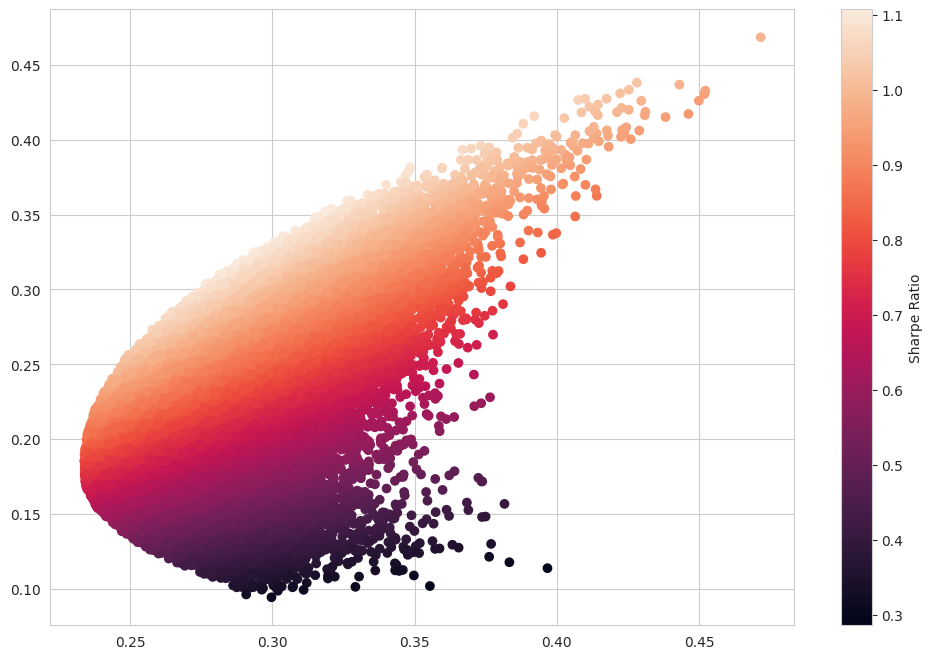

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = sharpe_ratios, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")

plt.show()

THE CURVE IS ALMOST A PERFECT HYPERBOLA!

This is also called the "Markowitz Bullet"

The upper part of the curve is referred to as the "Efficient Frontier"


The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk.

First let's find out the Portfolio with the maximum Sharpe Ratio

In [12]:

ind = 0

for i in range(len(sharpe_ratios)):
    if(sharpe_ratios[i] == np.amax(sharpe_ratios)):
        ind = i

In [13]:
print("Maximum Sharpe Ratio = ",sharpe_ratios[ind])
print("Corresponding Return =  ",portfolio_returns[ind])
print("Corresponding Risk =  ",portfolio_risks[ind])

Maximum Sharpe Ratio =  1.1077075434806951
Corresponding Return =   0.324911622218783
Corresponding Risk =   0.2933189578160939


SO HERE WE HAVE OUR MAX SHARPE RATIO PORTFOLIO

In [14]:
for i in range(len(stocks)):
    print(stocks[i], ':', portfolio_weights[ind][i])

ONGC.NS : 0.013517365655843005
ICICIBANK.NS : 0.16277599160799341
TATAMOTORS.NS : 0.006212061871299645
RELIANCE.NS : 0.4521590321409869
ADANIENT.NS : 0.3653355487238772


Plotting the point of our portfolio with max sharpe

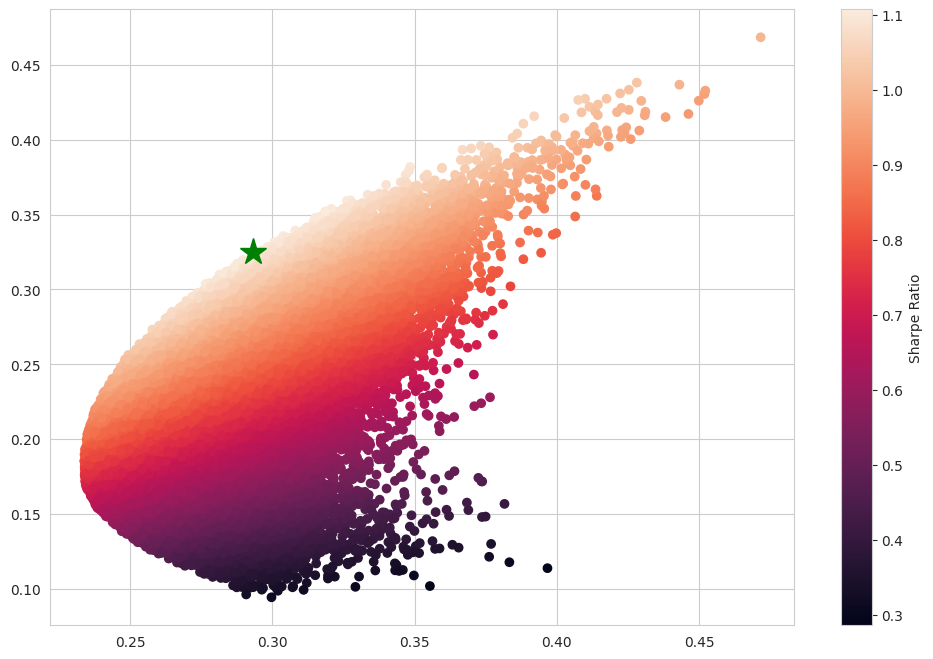

In [15]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = sharpe_ratios, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(portfolio_risks[ind],portfolio_returns[ind], 'g*',markersize = 20.0)


plt.show()

Now let's make a minimum risk portfolio

In [16]:
ind = 0
ind = np.argmin(portfolio_risks)

In [17]:
print("Minimum Risk = ",portfolio_risks[ind])
print("Corresponding Return =  ",portfolio_returns[ind])

Minimum Risk =  0.2338942834666966
Corresponding Return =   0.18550508838473326


In [18]:
for i in range(len(stocks)):
    print(stocks[i], ':', portfolio_weights[ind][i])

ONGC.NS : 0.2441865086992148
ICICIBANK.NS : 0.27328316367484107
TATAMOTORS.NS : 0.012994060722970303
RELIANCE.NS : 0.448290647470947
ADANIENT.NS : 0.021245619432026863


As we can see, this portfolio is very very different

Also we can see our calculations show us the basics of finance, when the risk is less, the returns are less

Plotting the point of our portfolio with minimum risk

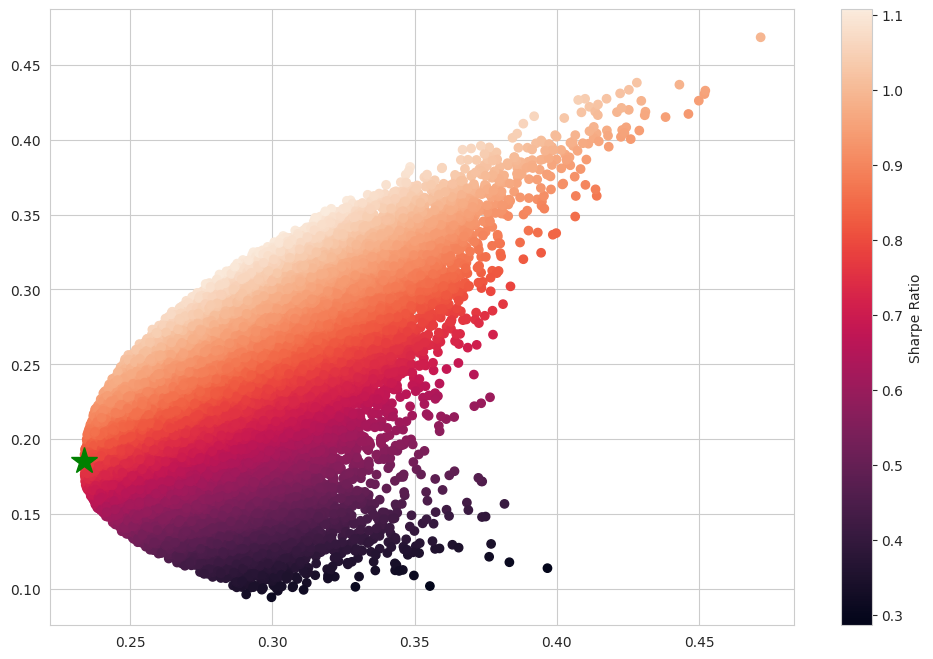

In [19]:
plt.figure(figsize=(12,8))
plt.scatter(portfolio_risks,portfolio_returns,c = sharpe_ratios, marker="o")
plt.grid(True)
plt.xlabel = ("Expected Risk")
plt.ylabel = ("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(portfolio_risks[ind],portfolio_returns[ind], 'g*',markersize = 20.0)


plt.show()

We can see the star is at the turning point of the hyperbola, as it signifies the point where the portfolio has least risk